# VERIFICA LEGGE DI OHM

OBIETTIVO: verificare V=RI

PROCEDIMENTO: resistenza fissata, variata tensione e misurata corrente

In [5]:
import pandas as pd # nicolo
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'VRI.csv'
fr = pd.read_csv(FILE)

R = 2 * 10**6 # usata resistenza 2MΩ
V = np.array(fr['V'])
I = np.array(fr['I']) * 10**-3

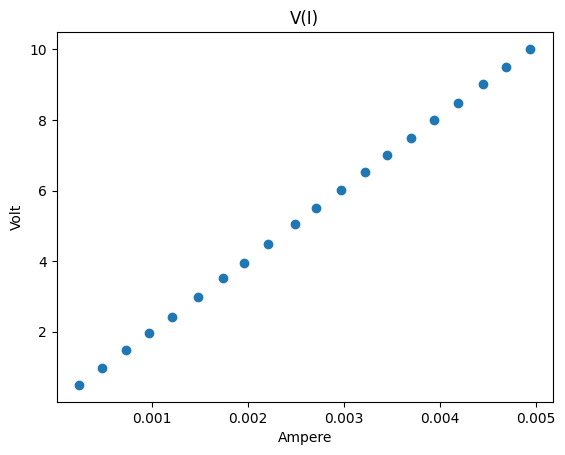

In [8]:
plt.title('V(I)')
plt.plot(I,V,'o')
plt.ylabel('Volt')
plt.xlabel('Ampere')
plt.show()